In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from esem import gp_model
from utils import *

### Prepare data

In [2]:
# List of dataset to use for training
train_files = ["ssp126", "ssp585", "historical", "hist-GHG"]

In [3]:
# Create training and testing arrays
X_train, eof_solvers = create_predictor_data(train_files)
y_train_tas = create_predictdand_data(train_files)['tas']

X_test = get_test_data('ssp245', eof_solvers)
Y_test = xr.open_dataset(data_path + 'outputs_ssp245.nc').compute()
tas_truth = Y_test["tas"].mean('member')

### Prepare model

In [4]:
from esem import gp_model
from esem.data_processors import Whiten, Normalise
import tensorflow as tf, tf_keras

# Just a *very* simple GP with default kernel assuming all years are independant

tas_gp = gp_model(X_train, y_train_tas, data_processors=[Whiten()])
tas_gp.train()

2024-05-01 17:31:19.955799: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


### Predict on testing set

In [5]:
# predict
standard_posterior_mean, standard_posterior_var = tas_gp.predict(X_test.values)
standard_posterior_mean = standard_posterior_mean.rename(sample='time')


In [6]:
# Compute RMSEs
print(f"RMSE 2090-2100: {get_rmse(tas_truth[65:], standard_posterior_mean[65:].data).mean()}")


RMSE 2090-2100: 0.46719328647465114


/Users/nightfury/UCSD/SPRING 2024/SIOC 209/sioc209-2024-sp/.venv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


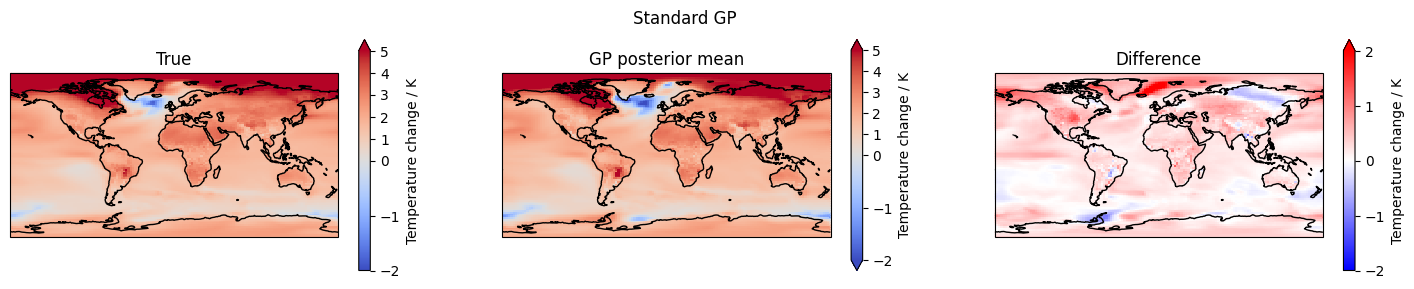

In [7]:
plot_diff(tas_truth, standard_posterior_mean, "Standard GP")